# Prediction of Car Price - Regression Model

##### Problem Statement : 
A Chinese Automobile company 'Geely Auto' aspires to enter US market by setting up their manufacturing unit there. The company basically wants to understand the factors which affects the price of the car.

The company essentially wants to know -

- which variables are significant in predicting the price of the car
- How well those variables describe the price of the car

# Step 1 : Reading and Understanding the data

In [2]:
## Importing the necessary python modules here
import pandas as pd
import numpy as np

In [3]:
## Loading the data set into car_price dataframe
car_price = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
## Checking the head of the dataset
car_price.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_price.shape

(205, 26)

In [6]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2 : Data Cleaning and Modification

In [10]:
## First dropping the column 'car_ID' as it does not make any effect on the car pice
car_price.drop('car_ID',axis=1,inplace=True)

In [11]:
## Now taking out the Car Brand name only from the 'CarName' column as mentioned in the objective
car_price['CarName'] = car_price['CarName'].apply(lambda x : x.split(" ",1)[0])

In [12]:
car_price['CarName'] = car_price['CarName'].str.upper()

In [13]:
car_price['CarName'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [14]:
## Since we can figure out some spelling mistakes in car brands, making the necessary corrections in this step
car_price['CarName'].replace({'MAXDA':'MAZDA','PORCSHCE':'PORSCHE','TOYOUTA':'TOYOTA','VOKSWAGEN':'VOLKSWAGEN','VW':'VOLKSWAGEN'},inplace=True)

In [15]:
car_price['CarName'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

# Step 3 : Visualising the different Variables

## This step helps in -

- Identifying the relationship between every independent variable and the dependent variable
- Identify if some independent variable has a strong correlation with the dependent variable
- To get an idea of multicollinearity between independent variables

In [16]:
## Importing the necessary python modules here
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing Numeric Variables against Price

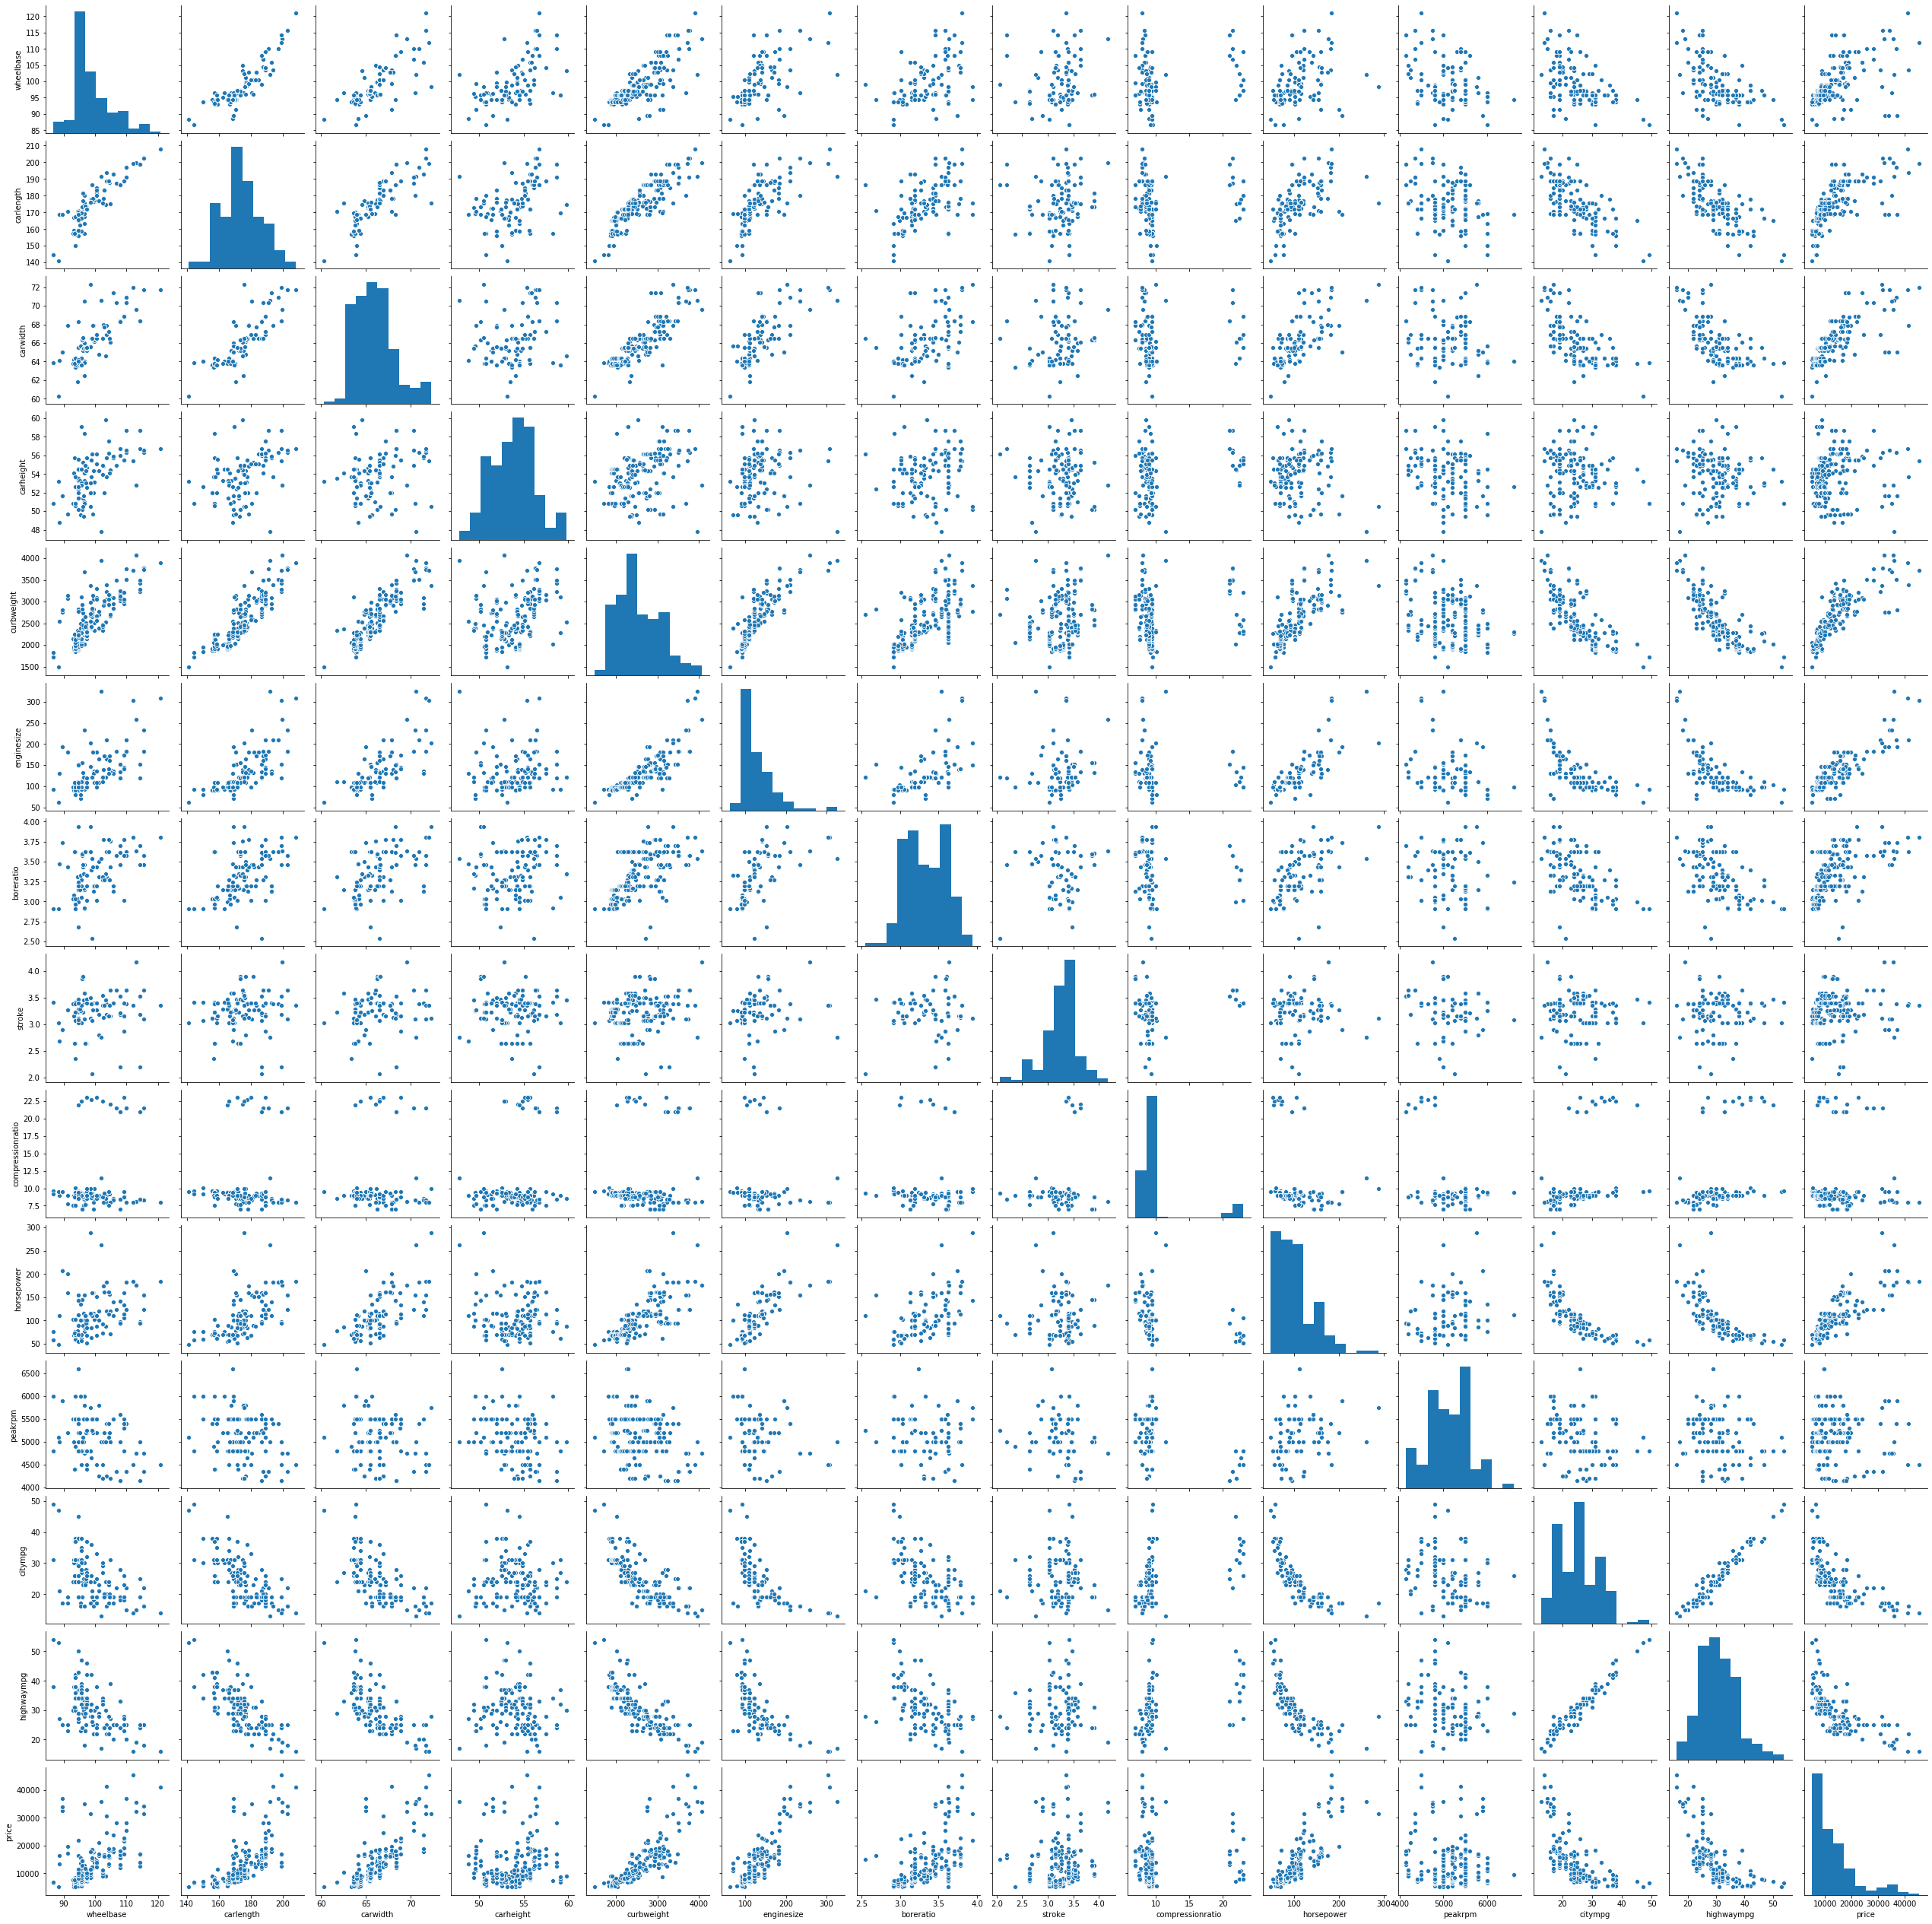

In [17]:
numeric_list = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
sns.pairplot(car_price[numeric_list])
plt.show()

#### Inferences : 
- Price follows positive linear relationship with 'enginesize' and 'horsepower'
- Price follows positive correlationship with 'wheelbase', 'carlength', 'carwidth', 'curbweight'
- 'Carheight','stroke','compressionratio','peakrpm' does not seems to have much correlationship with price

## Visualizing Categorical Variables against Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

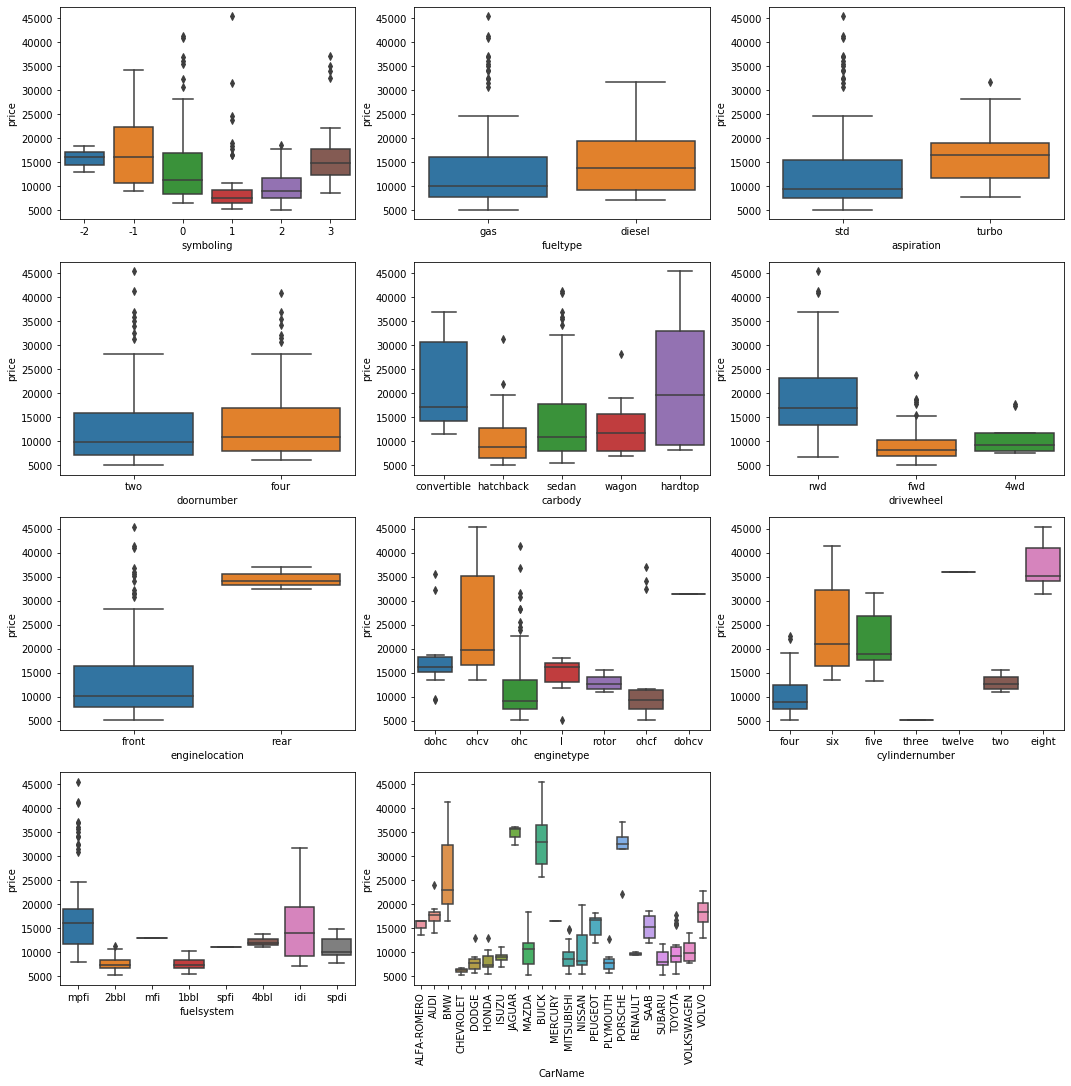

In [18]:
plt.figure(figsize=(18,18))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.subplot(4,3,11)
sns.boxplot(x = 'CarName', y = 'price', data = car_price)
plt.xticks(rotation=90)


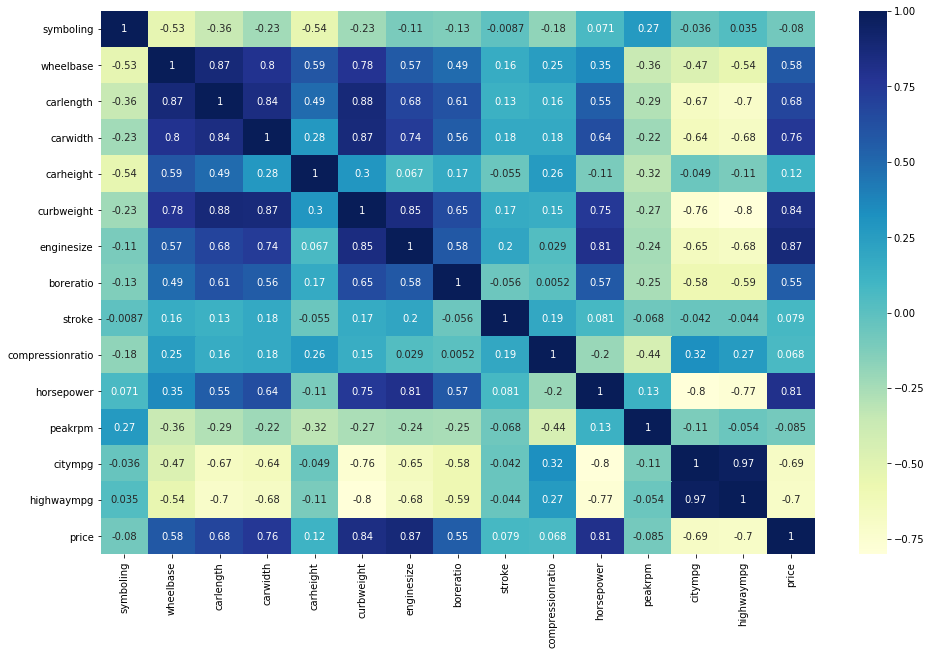

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inferences :

- 'Fuel Type' : Diesel cars are priced more than gasoline cars.
- 'Engine location' : Rear engine cars are priced significantly higher than the front engine cars.
- 'Aspiration' :Cars with Turbo aspirated engines are priced higher than standard aspirated engines.
- 'Symboling' : Symboling does not seem to have a linear correlationship with Price of the car
- 'Doornumber' : Doornumber does not seems to have effect on price of the car
- Heatmap confirms that price of the car does not correlate much with 'stroke','compressionratio'.'peakrpm'

# Step 4 : Exploratory Data Analysis

- In this step, we do Univariate, Bivariate and multivariate analysis for better understanding of impact of independent variables on dependent variable (i.e. the price of the car)

- Here we have dependent variable as one of our main target variable to visualize

## Univariate Analysis

### 1) Price of the Car

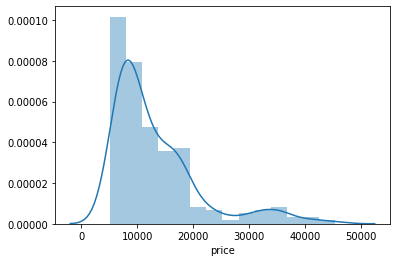

In [20]:
sns.distplot(car_price['price'])

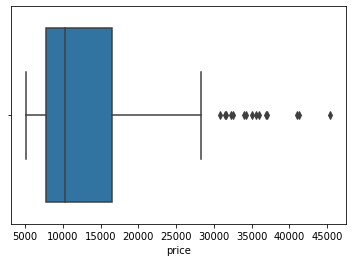

In [21]:
sns.boxplot(car_price['price'])

#### Inferences : 
- Distribution of Car Price is right skewed with almost 75% of values lying below around 16000

## Bivariate Analysis

### 1) CarName vs Average Price

Text(0, 0.5, 'Average Price')

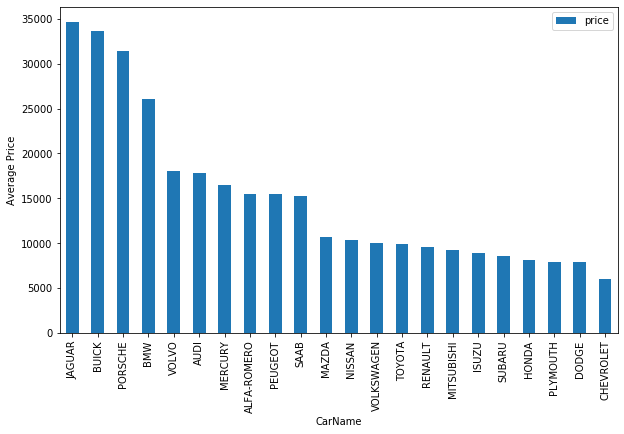

In [22]:
## Calculating the average price based on different CarNames
grouping1 = car_price.groupby(by='CarName',as_index=False)['price'].mean()
grouping1.sort_values('price',ascending=False).plot(x='CarName',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference : 
- Car Price seems to have relationship with CarName or brands

#### Important Note :
- Since CarName is a categorical variable with 22 levels, it is better to categorize CarName into 3 categories - Luxury, Mid ranged and Budget

In [23]:
grouping1 = grouping1.rename(columns={'price':'Average Price'})

In [24]:
car_price_new = pd.merge(car_price,grouping1,how='left',on='CarName',left_index=True)

In [25]:
car_price_new.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Average Price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.333333
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.333333
0,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.333333
1,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.166714
1,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.166714


In [26]:
## Adding a new column named 'Brand Category' to distinguish 3 segments and then finally dropping CarName column
car_price_new['Brand_Category'] = car_price_new['Average Price'].apply(lambda x: 'Budget' if x<10000 else('Mid_Range' if 10000<=x<20000 else 'Luxury'))

In [27]:
car_price_new.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Average Price,Brand_Category
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.333333,Mid_Range
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.333333,Mid_Range
0,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.333333,Mid_Range
1,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.166714,Mid_Range
1,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.166714,Mid_Range


In [28]:
## Dropping columns 'CarName' and 'Average Price'
car_price_new.drop(['CarName','Average Price'],axis=1,inplace=True)

In [29]:
car_price_new.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_Category
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Mid_Range
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Mid_Range
0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Mid_Range
1,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Mid_Range
1,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Mid_Range


### 2) Carbody vs Average Price

Text(0, 0.5, 'Average Price')

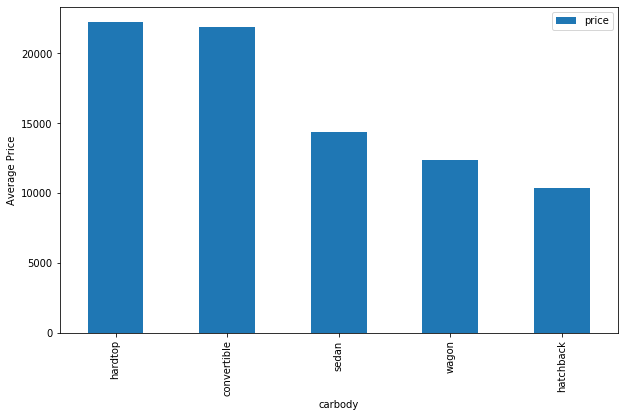

In [30]:
## Calculating the average price based on different Carbody
grouping2 = car_price_new.groupby(by='carbody',as_index=False)['price'].mean()
grouping2.sort_values('price',ascending=False).plot(x='carbody',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference :
- Carbody has a correlationship with average price of the car
- For eg Hardtop and convertible carbody have higher price followed by sedan than wagon than hatchback

### 3) Drivewheel vs Average Price

Text(0, 0.5, 'Average Price')

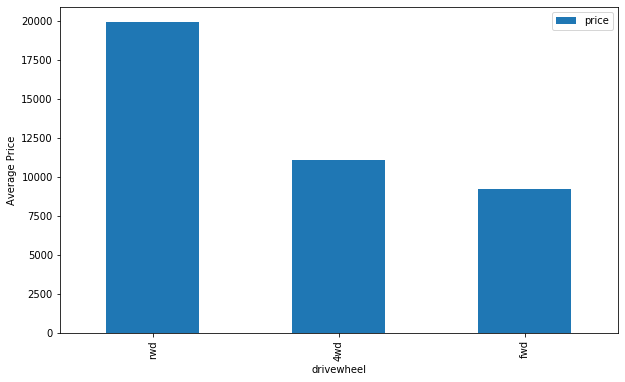

In [31]:
## Calculating the average price based on different drivewheel
grouping3 = car_price_new.groupby(by='drivewheel',as_index=False)['price'].mean()
grouping3.sort_values('price',ascending=False).plot(x='drivewheel',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference :
- Drivewheel has a correlationship with average price of the car

### 4) Enginetype vs Average Price

Text(0, 0.5, 'Average Price')

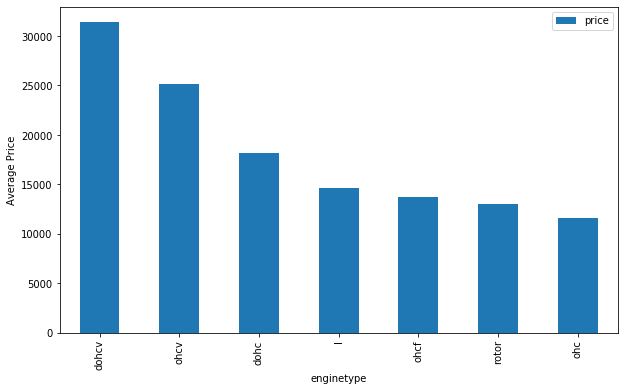

In [32]:
## Calculating the average price based on different enginetype
grouping4 = car_price_new.groupby(by='enginetype',as_index=False)['price'].mean()
grouping4.sort_values('price',ascending=False).plot(x='enginetype',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference :
- The Average price of car seems to have dependency on different engine type

### 5) Cylindernumber vs Average Price

Text(0, 0.5, 'Average Price')

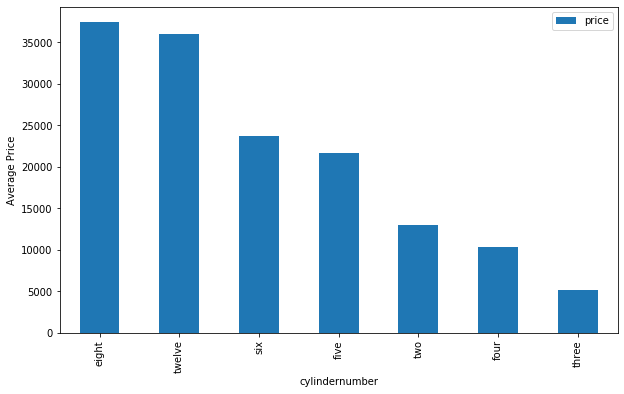

In [33]:
## Calculating the average price based on cylidernumber
grouping5 = car_price_new.groupby(by='cylindernumber',as_index=False)['price'].mean()
grouping5.sort_values('price',ascending=False).plot(x='cylindernumber',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference :
- Car Price also varies with the number of cylinders in the engine

### 6) Fuelsystem vs Average Price of the car

Text(0, 0.5, 'Average Price')

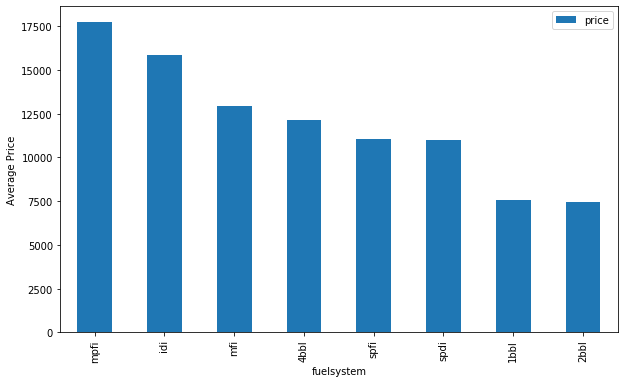

In [34]:
## Calculating the average price based on fuelsystem in the car
grouping6 = car_price_new.groupby(by='fuelsystem',as_index=False)['price'].mean()
grouping6.sort_values('price',ascending=False).plot(x='fuelsystem',kind='bar',figsize=(10,6))
plt.ylabel('Average Price')

#### Inference :
- mpfi Fuel system seems to priced highest followed by idi and so on....

### 7) Citympg and highwaympg vs price of the car

Note : Since two mileage variables - citympg and highwaympg are given, we can derive a new variable 'Mileage' considering 60% of city driving and 40% highway driving for US citizens

In [35]:
car_price_new['Mileage'] = 0.6 * car_price_new['citympg'] + 0.4 * car_price_new['highwaympg']

In [36]:
## Dropping the columns 'citympg' and 'highwaympg'
car_price_new.drop(['citympg','highwaympg'],axis=1,inplace=True)

In [37]:
car_price_new.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Brand_Category,Mileage
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,Mid_Range,23.4
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,Mid_Range,23.4
0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,Mid_Range,21.8
1,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,Mid_Range,26.4
1,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,Mid_Range,19.6


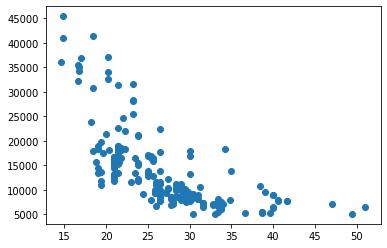

In [38]:
plt.scatter(x='Mileage',y='price',data=car_price_new)

#### Inference :
- Car Price seems to have negative correlationship with Mileage which is obvious

## Trivariate Analysis

### 1) Fueltype vs Price vs Carbody

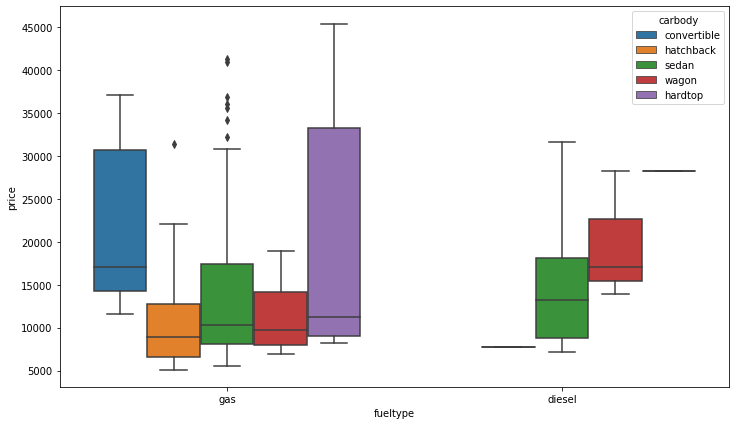

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='fueltype',y='price',hue='carbody',data=car_price_new)

### 2) Mileage vs Price vs Brand Category

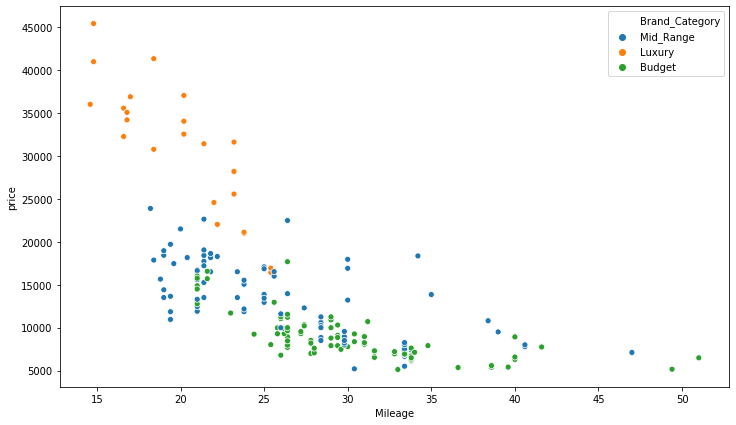

In [40]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Mileage',y='price',hue='Brand_Category',data=car_price_new)

### 3) Horsepower vs Price vs Brand Category

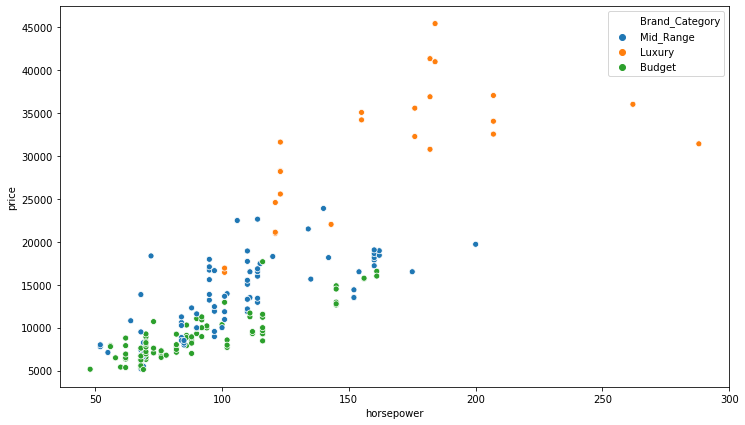

In [41]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='horsepower',y='price',hue='Brand_Category',data=car_price_new)

## Summary of EDA :
### Using the analysis performed in EDA as well as using the results from heatmap, it is figured out that these variables are the most important drivers of the car price :
- 1) Brand Category
- 2) Fuel Type
- 3) Aspiration
- 4) Carbody
- 5) Drivewheel
- 6) Engine location
- 7) Wheelbase
- 8) Carlength
- 9) Carwidth
- 10) Curbweight
- 11) Engine type
- 12) Cylinder number
- 13) Engine size
- 14) Fuelsystem
- 15) Boreratio
- 16) Horsepower
- 17) Mileage

# Step 5 : Data Preparation

In [42]:
## Taking only the selected variables for building Model
final_df = car_price_new[['Brand_Category','fueltype','aspiration','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','horsepower','Mileage','price']]

In [43]:
final_df.head()

,Brand_Category,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,Mileage,price
0,Mid_Range,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,23.4,13495.0
0,Mid_Range,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,23.4,16500.0
0,Mid_Range,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,21.8,16500.0
1,Mid_Range,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,26.4,13950.0
1,Mid_Range,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,19.6,17450.0


### Binary mapping of Categorical variables with two levels

In [44]:
## Creating list of categorical variables to map and defining function to map with 0 and 1
varlist = ['fueltype','aspiration','enginelocation']

def binary_map(x):
    return x.map({'gas':0,'diesel':1, 'std':0,'turbo':1,'front':0,'rear':1})

## Applying the function to the car_price list
final_df[varlist] = final_df[varlist].apply(binary_map)

C:\Users\SIDDHU\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
final_df.head()

,Brand_Category,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,Mileage,price
0,Mid_Range,0,0,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,23.4,13495.0
0,Mid_Range,0,0,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,23.4,16500.0
0,Mid_Range,0,0,hatchback,rwd,0,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,21.8,16500.0
1,Mid_Range,0,0,sedan,fwd,0,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,26.4,13950.0
1,Mid_Range,0,0,sedan,4wd,0,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,19.6,17450.0


### Creating dummy variables of Categorical variables with more than two levels

In [46]:
## Creating dummy variables for 'Brand Category' first and then dropping the main variable
brand_cat = pd.get_dummies(final_df['Brand_Category'],drop_first=True)
final_df = pd.concat([final_df,brand_cat],axis=1)
final_df.drop(['Brand_Category'],axis=1,inplace=True)

In [47]:
## Creating dummy variables for 'Carbody' first and then dropping the main variable
carbody_cat = pd.get_dummies(final_df['carbody'],drop_first=True)
final_df = pd.concat([final_df,carbody_cat],axis=1)
final_df.drop(['carbody'],axis=1,inplace=True)

In [48]:
## Creating dummy variables for 'Drivewheel' first and then dropping the main variable
drivewheel_cat = pd.get_dummies(final_df['drivewheel'],drop_first=True)
final_df = pd.concat([final_df,drivewheel_cat],axis=1)
final_df.drop(['drivewheel'],axis=1,inplace=True)

In [49]:
## Creating dummy variables for 'Enginetype' first and then dropping the main variable
enginetype_cat = pd.get_dummies(final_df['enginetype'],drop_first=True)
final_df = pd.concat([final_df,enginetype_cat],axis=1)
final_df.drop(['enginetype'],axis=1,inplace=True)

In [50]:
## Creating dummy variables for 'Cylindernumber' first and then dropping the main variable
cylindernumber_cat = pd.get_dummies(final_df['cylindernumber'],drop_first=True)
final_df = pd.concat([final_df,cylindernumber_cat],axis=1)
final_df.drop(['cylindernumber'],axis=1,inplace=True)

In [51]:
## Creating dummy variables for 'Fuelsystem' first and then dropping the main variable
fuelsystem_cat = pd.get_dummies(final_df['fuelsystem'],drop_first=True)
final_df = pd.concat([final_df,fuelsystem_cat],axis=1)
final_df.drop(['fuelsystem'],axis=1,inplace=True)

In [52]:
final_df.head()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,88.6,168.8,64.1,2548,130,3.47,111,...,0,0,0,0,0,0,0,1,0,0
0,0,0,0,88.6,168.8,64.1,2548,130,3.47,111,...,0,0,0,0,0,0,0,1,0,0
0,0,0,0,94.5,171.2,65.5,2823,152,2.68,154,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,99.8,176.6,66.2,2337,109,3.19,102,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,99.4,176.6,66.4,2824,136,3.19,115,...,0,0,0,0,0,0,0,1,0,0


In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 21
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    int64  
 1   aspiration      205 non-null    int64  
 2   enginelocation  205 non-null    int64  
 3   wheelbase       205 non-null    float64
 4   carlength       205 non-null    float64
 5   carwidth        205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   enginesize      205 non-null    int64  
 8   boreratio       205 non-null    float64
 9   horsepower      205 non-null    int64  
 10  Mileage         205 non-null    float64
 11  price           205 non-null    float64
 12  Luxury          205 non-null    uint8  
 13  Mid_Range       205 non-null    uint8  
 14  hardtop         205 non-null    uint8  
 15  hatchback       205 non-null    uint8  
 16  sedan           205 non-null    uint8  
 17  wagon           205 non-null    uint

# Step 6 : Splitting the data into Training and Test sets

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df_train, df_test = train_test_split(final_df, train_size = 0.8, test_size=0.2, random_state=100)

### Rescaling the Features

We will use the MinMax Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
## Applying the scaler() function to all columns except categorical (binary mapped and dummy) variables
num_vars = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','Mileage']

df_train[num_vars] = scaler.fit_transform((df_train[num_vars]))

C:\Users\SIDDHU\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SIDDHU\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
df_train.head()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
1,0,0,0,0.455172,0.577236,0.491667,0.329325,0.181132,0.404762,0.225000,...,0,0,0,0,0,0,0,1,0,0
19,0,0,0,0.313793,0.409756,0.341667,0.240884,0.139623,0.404762,0.091667,...,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0.334483,0.518699,0.425000,0.325834,0.230189,0.531746,0.166667,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0.244828,0.144715,0.308333,0.135376,0.067925,0.182540,0.050000,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0.365517,0.525203,0.408333,0.324282,0.222642,0.515873,0.204167,...,0,0,0,1,0,0,0,0,0,0


In [59]:
df_train.describe()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,0.103659,0.170732,0.012195,0.404605,0.519899,0.454726,0.398579,0.236493,0.489983,0.221037,...,0.006098,0.006098,0.02439,0.353659,0.018293,0.103659,0.006098,0.414634,0.042683,0.0
std,0.305751,0.377427,0.110092,0.197731,0.197651,0.179980,0.202330,0.148945,0.203913,0.164011,...,0.078087,0.078087,0.15473,0.479569,0.134418,0.305751,0.078087,0.494168,0.202760,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.272414,0.409756,0.308333,0.247673,0.135849,0.293651,0.090625,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.347944,0.184906,0.468254,0.183333,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.475862,0.615041,0.516667,0.522789,0.287736,0.682540,0.283333,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Dividing into X and y sets for model building

In [60]:
y_train = df_train.pop('price')
X_train = df_train

# Step 7 : Building our Model

Note : Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE (Recursive Feature Elimination)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
## Running RFE with the output number of variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 25),
 ('aspiration', False, 21),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 17),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('Mileage', False, 3),
 ('Luxury', True, 1),
 ('Mid_Range', False, 16),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 23),
 ('rwd', False, 18),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 10),
 ('ohcf', False, 11),
 ('ohcv', False, 14),
 ('rotor', False, 28),
 ('five', False, 7),
 ('four', False, 4),
 ('six', False, 6),
 ('three', False, 12),
 ('twelve', False, 5),
 ('two', False, 27),
 ('2bbl', False, 26),
 ('4bbl', False, 20),
 ('idi', False, 22),
 ('mfi', False, 8),
 ('mpfi', False, 24),
 ('spdi', False, 9),
 ('spfi', False, 29)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'Luxury',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv'],
      dtype='object')

In [65]:
col2 = X_train.columns[~rfe.support_]
col2 

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'enginesize',
       'boreratio', 'Mileage', 'Mid_Range', 'fwd', 'rwd', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

### Building model using Statsmodel for the detailed statistics

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     216.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.55e-85
Time:                        17:51:16   Log-Likelihood:                -1476.7
No. Observations:                 164   AIC:                             2975.
Df Residuals:                     153   BIC:                             3009.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4350.1924   1065.495      4.

### Inferences - 
- Looking at the p-values for different coefficients and R-squared, the model seems to have a good fit. But we have to look at VIF values to eliminate multicollinearity

### Checking VIF

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
X_train_rfe = X_train_rfe.drop(['const'],axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,37.63
1,carwidth,32.71
3,horsepower,11.55
7,sedan,4.77
6,hatchback,3.03
8,wagon,2.30
4,Luxury,2.00
0,enginelocation,1.51
9,dohcv,1.45
5,hardtop,1.25


Note : We generally want a VIF value less than 5. So there are clearly some variables to drop

### Dropping the variable and updating the model

In [72]:
# Dropping variables one by one having high VIF value (VIF>5)
# Dropping first the 'Curbweight' Variable since it has the highest VIF value

X = X_train_rfe.drop('curbweight', axis=1)

In [73]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the second model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.05e-82
Time:                        17:52:29   Log-Likelihood:                -1487.3
No. Observations:                 164   AIC:                             2995.
Df Residuals:                     154   BIC:                             3026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4825.9003   1127.597      4.

In [76]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,15.42
2,horsepower,7.55
6,sedan,4.77
5,hatchback,2.94
7,wagon,2.15
3,Luxury,1.88
0,enginelocation,1.45
4,hardtop,1.25
8,dohcv,1.21


Note : We have to drop now 'carwidth' as it has high VIF

### Dropping the variable and updating the model again

In [77]:
## Dropping the variable ' carwidth' since it has high p-value (greater than significance level)
X = X.drop('carwidth', axis=1)

In [78]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [79]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.36e-63
Time:                        18:19:13   Log-Likelihood:                -1535.0
No. Observations:                 164   AIC:                             3088.
Df Residuals:                     155   BIC:                             3116.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8308.0975   1443.065      5.

In [80]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.44
5,sedan,2.02
2,Luxury,1.82
4,hatchback,1.76
0,enginelocation,1.36
6,wagon,1.28
7,dohcv,1.20
3,hardtop,1.19


### Dropping the variable and updating the model again

In [81]:
# Dropping now the 'enginelocation' Variable since it has high p -value

X = X.drop('enginelocation', axis=1)

In [82]:
# Building a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [83]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.10e-64
Time:                        18:21:23   Log-Likelihood:                -1535.0
No. Observations:                 164   AIC:                             3086.
Df Residuals:                     156   BIC:                             3111.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8289.1187   1400.655      5.918      0.0

In [84]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.22
4,sedan,1.91
1,Luxury,1.76
3,hatchback,1.72
5,wagon,1.26
6,dohcv,1.17
2,hardtop,1.11


### Dropping the variable and updating the model again

In [85]:
## Dropping the variable ' sedan' since it has high p-value (greater than significance level)
X = X.drop('sedan', axis=1)

In [86]:
# Building a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.29e-65
Time:                        18:23:07   Log-Likelihood:                -1536.1
No. Observations:                 164   AIC:                             3086.
Df Residuals:                     157   BIC:                             3108.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6378.9397    472.536     13.499      0.0

In [88]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.49
1,Luxury,1.72
3,hatchback,1.42
4,wagon,1.15
5,dohcv,1.11
2,hardtop,1.06


## Dropping the variable and updating the model again

In [89]:
## Dropping the variable ' wagon' since it has high p-value (greater than significance level)
X = X.drop('wagon', axis=1)

In [90]:
# Building a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     200.4
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.75e-66
Time:                        18:25:36   Log-Likelihood:                -1536.2
No. Observations:                 164   AIC:                             3084.
Df Residuals:                     158   BIC:                             3103.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6299.0171    444.125     14.183      0.0

In [93]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.17
1,Luxury,1.67
3,hatchback,1.37
4,dohcv,1.10
2,hardtop,1.05


## Dropping the variable and updating the model again

In [94]:
## Dropping the variable ' hardtop' since it has high p-value (greater than significance level)
X = X.drop('hardtop', axis=1)

In [95]:
# Building a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.20e-67
Time:                        18:27:48   Log-Likelihood:                -1537.6
No. Observations:                 164   AIC:                             3085.
Df Residuals:                     159   BIC:                             3101.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6269.4659    446.314     14.047      0.0

In [97]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.10
1,Luxury,1.67
2,hatchback,1.36
3,dohcv,1.10


### Note : Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Step 8 : Residual Analysis of the train data

Note : In this step we have to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
y_train_price = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

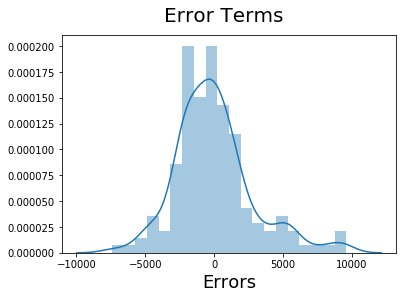

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 9 : Making Predictions using the Final model

#### Applying the scaling on the test sets

In [100]:
num_vars = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','Mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\SIDDHU\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SIDDHU\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [101]:
df_test.describe()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.0,41.0,41.0,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000
mean,0.073171,0.219512,0.024390,0.477544,0.599207,0.517683,0.476215,0.297561,0.618467,0.284959,...,0.0,0.0,0.0,0.195122,0.0,0.073171,0.0,0.634146,0.048780,0.024390
std,0.263652,0.419058,0.156174,0.237096,0.202206,0.166533,0.190466,0.180215,0.229504,0.159654,...,0.0,0.0,0.0,0.401218,0.0,0.263652,0.0,0.487652,0.218085,0.156174
min,0.000000,0.000000,0.000000,0.000000,0.056911,0.291667,0.128394,0.109434,-0.111111,0.083333,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.320690,0.497561,0.408333,0.347944,0.184906,0.468254,0.154167,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.431034,0.570732,0.516667,0.483320,0.230189,0.682540,0.266667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.610345,0.741463,0.575000,0.603957,0.320755,0.746032,0.404167,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,...,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [102]:
y_test = df_test.pop('price')
X_test = df_test

In [103]:
# Adding constant variable to test dataframe
X_test_m7 = sm.add_constant(X_test)

In [104]:
col_to_drop = ['fueltype', 'aspiration', 'wheelbase', 'carlength', 'enginesize',
       'boreratio', 'Mileage', 'Mid_Range', 'fwd', 'rwd', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi','curbweight','sedan','wagon','hardtop','carwidth','enginelocation']

In [105]:
# Creating X_test_m7 dataframe by dropping variables from X_test_m7

X_test_m7 = X_test_m7.drop(col_to_drop, axis = 1)

In [106]:
# Making predictions using the fourth model

y_pred_m7 = lr_7.predict(X_test_m7)

# Step 10 : Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

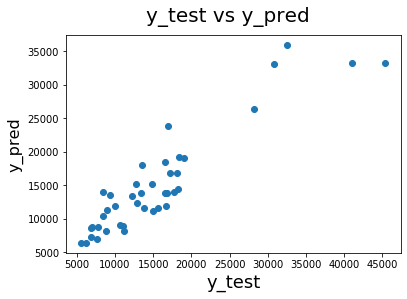

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We deduce that the equation of our best fitted line is -
-  **price = 6269 + (27280 * horsepower) + (11570 * Luxury) - (2160 * hatchback) - (11560 * dohcv)**

##### Checking the R-squared on the test set

In [108]:
from sklearn.metrics import r2_score

In [109]:
r_squared = r2_score(y_test, y_pred_m7)
r_squared

0.8416870419548109

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
np.sqrt(mean_squared_error(y_test, y_pred_m7))

3492.3111422593483

## Inference on the final model:

- Approximately 85% of variances in the price of the car is explained by four variables :
    - 1) Horsepower (positive relationship)
    - 2) Luxury segment (positive relationship)
    - 3) Hatchback (Negative relationship)
    - 4) dohcv (Negative relationship)
 
- Interpretation of the model :
    - 1) Price increases by approx. 27280 in monetary value per unit increase in horsepower
    - 2) Price increases by approx. 11570 in monetary value if the car brand falls under luxury category
    - 3) Price decreases by approx 2160 in monetary value if it is a hatchback car
    - 4) Price decreases by approx 11560 in monetary value if the car has dohcv engine type